# 🚢 Metodología SEMMA: Caso Práctico con Dataset Titanic

## Investigación: Aplicación de la Metodología SEMMA en un Caso Práctico

**Dataset:** Titanic: Machine Learning from Disaster (Kaggle)

**Autores:** Equipo Práctico

---

### Contenido:
1. **SAMPLE** - Muestreo y preparación de datos
2. **EXPLORE** - Exploración y análisis descriptivo
3. **MODIFY** - Transformación y preparación
4. **MODEL** - Modelado con algoritmos ML
5. **ASSESS** - Evaluación y comparación de modelos

## 📦 Importación de Librerías

In [1]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette('husl')

# Scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             roc_auc_score)

# XGBoost
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except ImportError:
    print("⚠️ XGBoost no instalado. Instalando...")
    !pip install xgboost -q
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True

print(" Todas las librerías cargadas correctamente!")

 Todas las librerías cargadas correctamente!


---
# 1️⃣ SAMPLE - Muestreo

**Objetivo:** Seleccionar y preparar una muestra representativa del dataset.

**Acciones:**
- Carga del dataset completo (train.csv con 891 registros)
- División en conjuntos de entrenamiento (80%) y validación (20%)
- Verificación de distribuciones para asegurar representatividad

In [2]:
# Cargar el dataset Titanic
df = pd.read_csv('../data/titanic.csv')

# Información básica del dataset
print("="*60)
print("📊 INFORMACIÓN DEL DATASET TITANIC")
print("="*60)
print(f"\n📁 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n📋 Columnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

📊 INFORMACIÓN DEL DATASET TITANIC

📁 Dimensiones: 891 filas × 12 columnas

📋 Columnas disponibles:
    1. PassengerId
    2. Survived
    3. Pclass
    4. Name
    5. Sex
    6. Age
    7. SibSp
    8. Parch
    9. Ticket
   10. Fare
   11. Cabin
   12. Embarked


In [3]:
# Visualizar primeras filas
print("\n🔍 Primeras 5 filas del dataset:")
df.head()


🔍 Primeras 5 filas del dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Información de tipos de datos
print("\n Tipos de datos:")
print(df.dtypes)


 Tipos de datos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# División del dataset en entrenamiento y validación
# Usamos estratificación para mantener la proporción de sobrevivientes

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Mantener proporción de clases
)

print("\n" + "="*60)
print("DIVISIÓN DEL DATASET")
print("="*60)
print(f"\n🔹 Conjunto de Entrenamiento: {len(X_train)} registros ({len(X_train)/len(df)*100:.1f}%)")
print(f"🔹 Conjunto de Validación: {len(X_val)} registros ({len(X_val)/len(df)*100:.1f}%)")


DIVISIÓN DEL DATASET

🔹 Conjunto de Entrenamiento: 712 registros (79.9%)
🔹 Conjunto de Validación: 179 registros (20.1%)


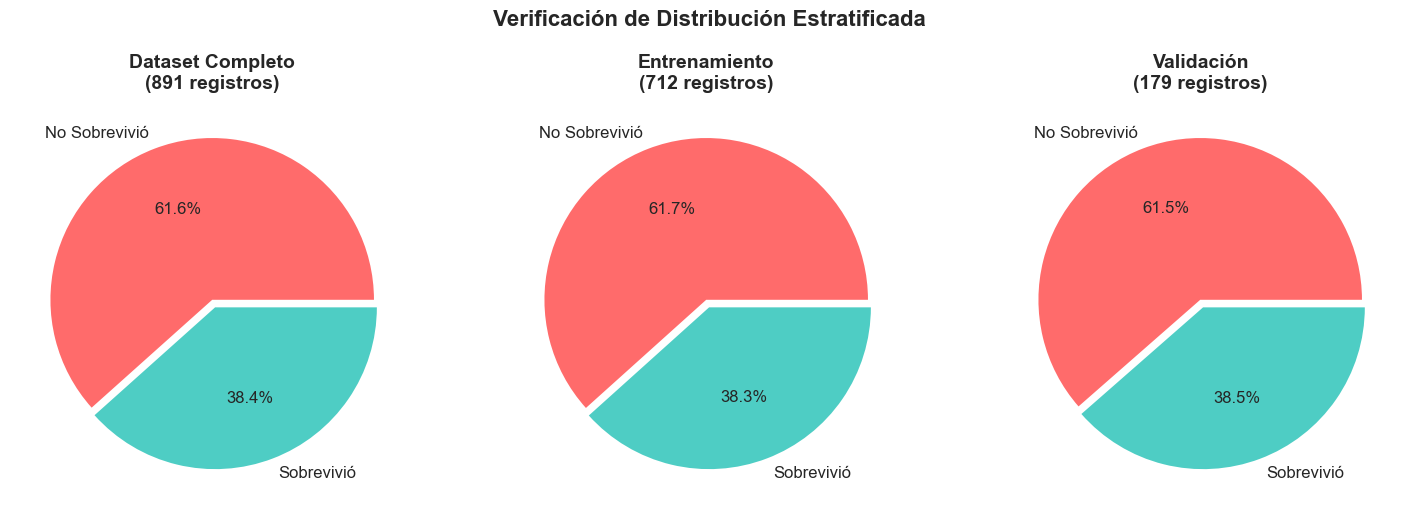


 SAMPLE completado: Distribución estratificada verificada!


In [7]:
# Verificar distribución de la variable objetivo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Dataset completo
axes[0].pie(y.value_counts(), labels=['No Sobrevivió', 'Sobrevivió'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], explode=[0, 0.05])
axes[0].set_title('Dataset Completo\n(891 registros)', fontsize=14, fontweight='bold')

# Entrenamiento
axes[1].pie(y_train.value_counts(), labels=['No Sobrevivió', 'Sobrevivió'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], explode=[0, 0.05])
axes[1].set_title(f'Entrenamiento\n({len(y_train)} registros)', fontsize=14, fontweight='bold')

# Validación
axes[2].pie(y_val.value_counts(), labels=['No Sobrevivió', 'Sobrevivió'], 
            autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], explode=[0, 0.05])
axes[2].set_title(f'Validación\n({len(y_val)} registros)', fontsize=14, fontweight='bold')

plt.suptitle(' Verificación de Distribución Estratificada', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/graficos/01_sample_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n SAMPLE completado: Distribución estratificada verificada!")

---
# 2️⃣ EXPLORE - Exploración

**Objetivo:** Analizar características, distribuciones y relaciones entre variables.

**Acciones:**
- Análisis descriptivo: media, desviación, frecuencias
- Visualizaciones: histogramas, boxplots, heatmaps de correlación
- Identificación de valores atípicos y valores faltantes

In [8]:
# Estadísticas descriptivas
print("="*60)
print(" ESTADÍSTICAS DESCRIPTIVAS")
print("="*60)
df.describe()

 ESTADÍSTICAS DESCRIPTIVAS


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



 ANÁLISIS DE VALORES FALTANTES
          Total Faltantes  Porcentaje (%)
Cabin                 687           77.10
Age                   177           19.87
Embarked                2            0.22


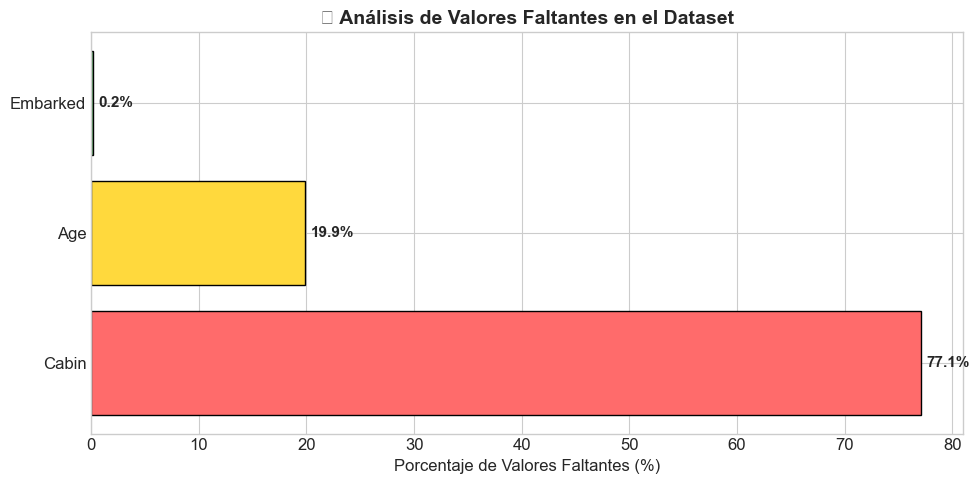

In [9]:
# Análisis de valores faltantes
print("\n" + "="*60)
print(" ANÁLISIS DE VALORES FALTANTES")
print("="*60)

missing_data = pd.DataFrame({
    'Total Faltantes': df.isnull().sum(),
    'Porcentaje (%)': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Total Faltantes'] > 0].sort_values('Total Faltantes', ascending=False)
print(missing_data)

# Visualización de valores faltantes
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#ff6b6b' if x > 50 else '#ffd93d' if x > 10 else '#6bcb77' for x in missing_data['Porcentaje (%)']]
bars = ax.barh(missing_data.index, missing_data['Porcentaje (%)'], color=colors, edgecolor='black')
ax.set_xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12)
ax.set_title(' Análisis de Valores Faltantes en el Dataset', fontsize=14, fontweight='bold')

for bar, val in zip(bars, missing_data['Porcentaje (%)']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/graficos/02_explore_missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

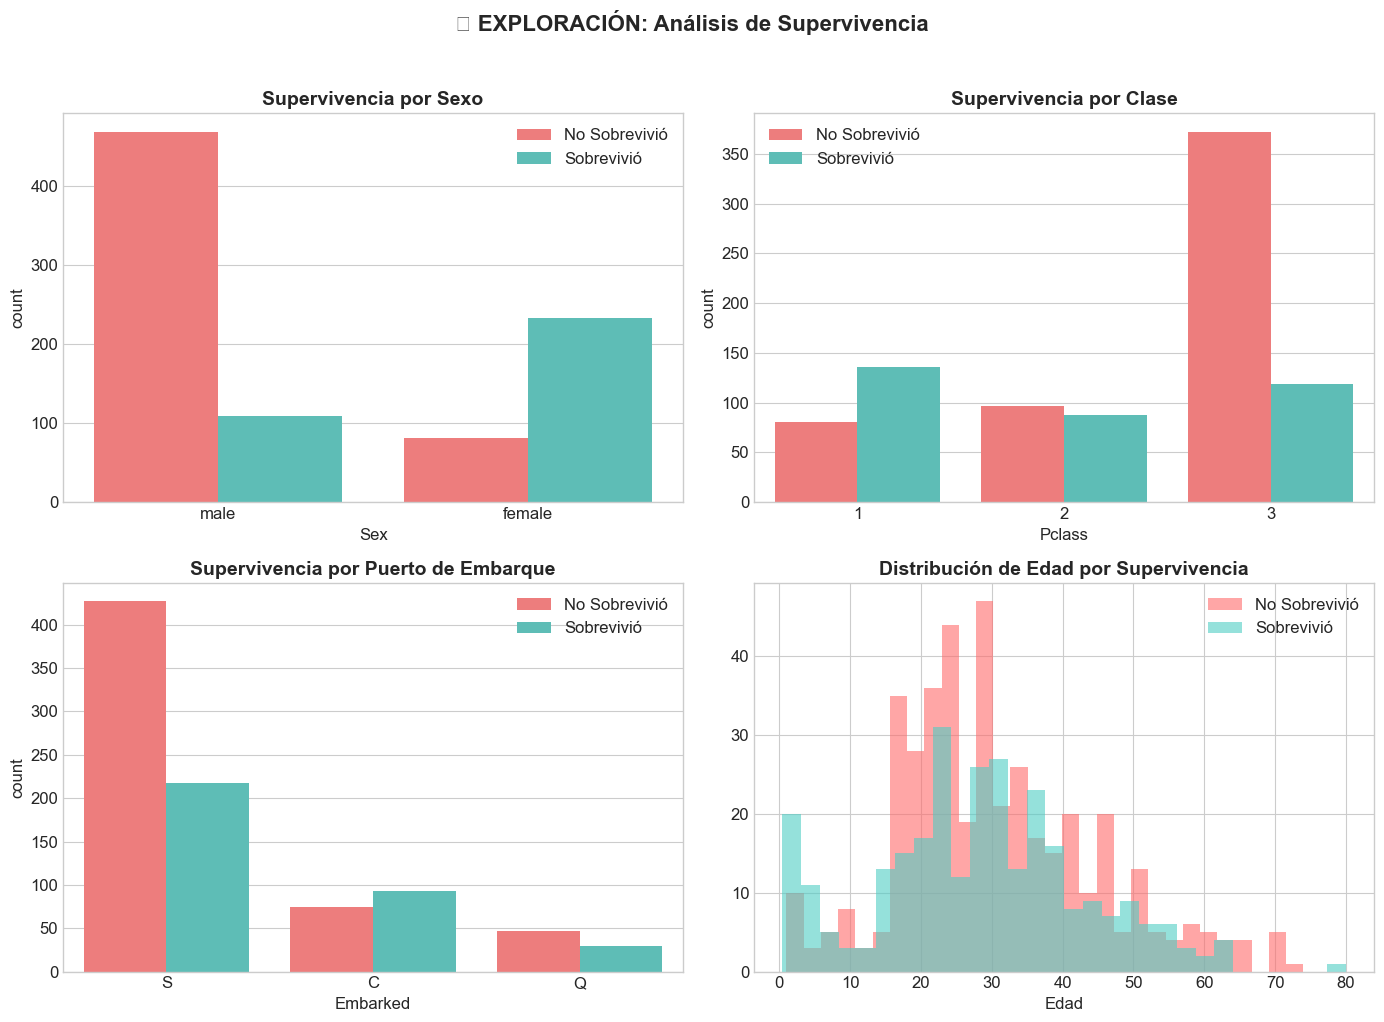

In [ ]:
# Distribución de supervivencia por variables categóricas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Por Sexo
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,0], palette=['#ff6b6b', '#4ecdc4'])
axes[0,0].set_title('Supervivencia por Sexo', fontsize=14, fontweight='bold')
axes[0,0].legend(['No Sobrevivió', 'Sobrevivió'])

# Por Clase
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0,1], palette=['#ff6b6b', '#4ecdc4'])
axes[0,1].set_title('Supervivencia por Clase', fontsize=14, fontweight='bold')
axes[0,1].legend(['No Sobrevivió', 'Sobrevivió'])

# Por Puerto de Embarque
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1,0], palette=['#ff6b6b', '#4ecdc4'])
axes[1,0].set_title('Supervivencia por Puerto de Embarque', fontsize=14, fontweight='bold')
axes[1,0].legend(['No Sobrevivió', 'Sobrevivió'])

# Distribución de Edades por Supervivencia
df[df['Survived']==0]['Age'].hist(ax=axes[1,1], alpha=0.6, label='No Sobrevivió', color='#ff6b6b', bins=30)
df[df['Survived']==1]['Age'].hist(ax=axes[1,1], alpha=0.6, label='Sobrevivió', color='#4ecdc4', bins=30)
axes[1,1].set_title('Distribución de Edad por Supervivencia', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Edad')
axes[1,1].legend()

plt.suptitle('EXPLORACIÓN: Análisis de Supervivencia', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/graficos/03_explore_survival_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

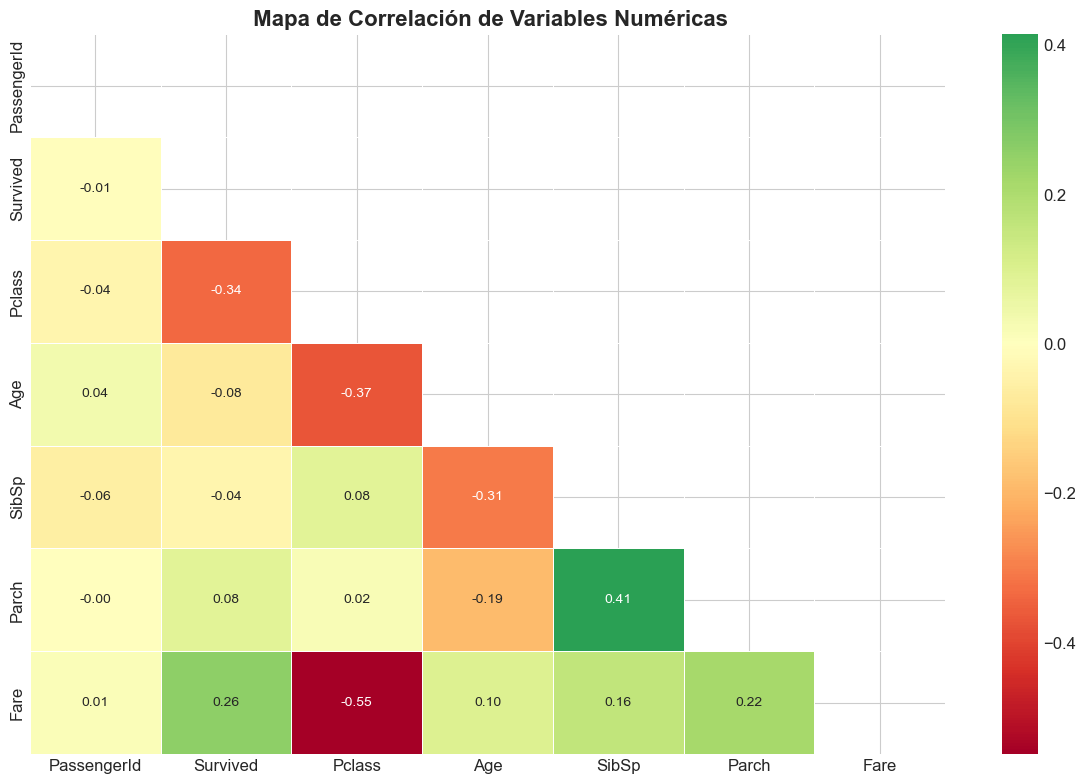


 EXPLORE completado!


In [11]:
# Heatmap de correlación
plt.figure(figsize=(12, 8))

# Seleccionar solo columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, linewidths=0.5,
            annot_kws={'size': 10})

plt.title(' Mapa de Correlación de Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/graficos/04_explore_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n EXPLORE completado!")

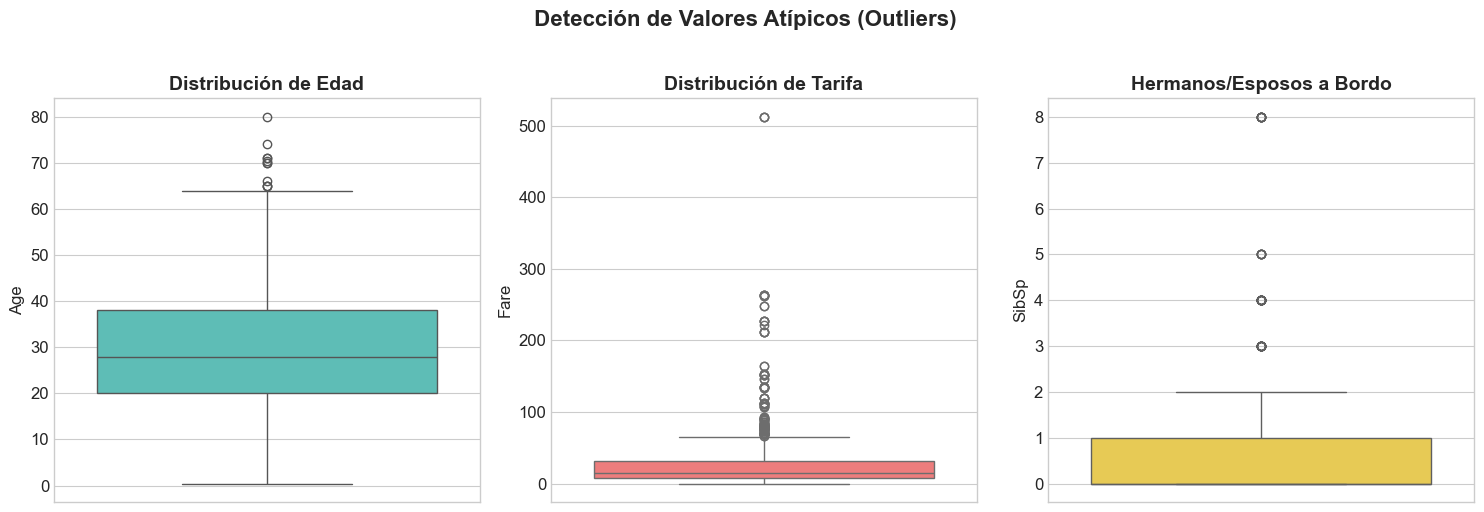

In [12]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age
sns.boxplot(data=df, y='Age', ax=axes[0], color='#4ecdc4')
axes[0].set_title('Distribución de Edad', fontsize=14, fontweight='bold')

# Fare
sns.boxplot(data=df, y='Fare', ax=axes[1], color='#ff6b6b')
axes[1].set_title('Distribución de Tarifa', fontsize=14, fontweight='bold')

# SibSp + Parch
sns.boxplot(data=df, y='SibSp', ax=axes[2], color='#ffd93d')
axes[2].set_title('Hermanos/Esposos a Bordo', fontsize=14, fontweight='bold')

plt.suptitle(' Detección de Valores Atípicos (Outliers)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/graficos/05_explore_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

---
# 3️⃣ MODIFY - Modificación

**Objetivo:** Transformar y preparar los datos para el modelado.

**Acciones:**
- Imputación de valores faltantes (mediana para Age, moda para Embarked)
- Creación de nuevas variables: FamilySize, Title, IsAlone
- Codificación de variables categóricas (Sex, Embarked)
- Normalización de variables numéricas (Age, Fare)

In [13]:
# Crear una copia del dataset para modificar
df_modified = df.copy()

print("="*60)
print(" MODIFICACIÓN DE DATOS")
print("="*60)

 MODIFICACIÓN DE DATOS


In [14]:
# 1. IMPUTACIÓN DE VALORES FALTANTES
print("\n 1. Imputación de Valores Faltantes")
print("-"*40)

# Age: Imputar con la mediana
age_median = df_modified['Age'].median()
df_modified['Age'].fillna(age_median, inplace=True)
print(f"   ✓ Age: Imputado con mediana = {age_median:.1f}")

# Embarked: Imputar con la moda
embarked_mode = df_modified['Embarked'].mode()[0]
df_modified['Embarked'].fillna(embarked_mode, inplace=True)
print(f"   ✓ Embarked: Imputado con moda = '{embarked_mode}'")

# Cabin: Tiene muchos nulos, crear variable indicadora
df_modified['HasCabin'] = df_modified['Cabin'].notna().astype(int)
print(f"   ✓ Cabin: Creada variable indicadora 'HasCabin'")


 1. Imputación de Valores Faltantes
----------------------------------------
   ✓ Age: Imputado con mediana = 28.0
   ✓ Embarked: Imputado con moda = 'S'
   ✓ Cabin: Creada variable indicadora 'HasCabin'


In [15]:
# 2. FEATURE ENGINEERING - Crear nuevas variables
print("\n 2. Feature Engineering - Nuevas Variables")
print("-"*40)

# FamilySize: SibSp + Parch + 1 (el pasajero mismo)
df_modified['FamilySize'] = df_modified['SibSp'] + df_modified['Parch'] + 1
print(f"   ✓ FamilySize creada (SibSp + Parch + 1)")

# IsAlone: Si viaja solo
df_modified['IsAlone'] = (df_modified['FamilySize'] == 1).astype(int)
print(f"   ✓ IsAlone creada (1 si viaja solo, 0 si tiene familia)")

# Title: Extraer del nombre
df_modified['Title'] = df_modified['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupar títulos poco comunes
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Mme': 'Mrs', 'Capt': 'Rare',
    'Sir': 'Rare', 'Dona': 'Rare'
}
df_modified['Title'] = df_modified['Title'].map(title_mapping)
df_modified['Title'].fillna('Rare', inplace=True)
print(f"   ✓ Title extraído del nombre y agrupado")

# Mostrar distribución de títulos
print(f"\n   Distribución de Títulos:")
print(df_modified['Title'].value_counts())


 2. Feature Engineering - Nuevas Variables
----------------------------------------
   ✓ FamilySize creada (SibSp + Parch + 1)
   ✓ IsAlone creada (1 si viaja solo, 0 si tiene familia)
   ✓ Title extraído del nombre y agrupado

   Distribución de Títulos:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [16]:
# 3. CODIFICACIÓN DE VARIABLES CATEGÓRICAS
print("\n 3. Codificación de Variables Categóricas")
print("-"*40)

# Label Encoding para Sex
le_sex = LabelEncoder()
df_modified['Sex_encoded'] = le_sex.fit_transform(df_modified['Sex'])
print(f"   ✓ Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")

# Label Encoding para Embarked
le_embarked = LabelEncoder()
df_modified['Embarked_encoded'] = le_embarked.fit_transform(df_modified['Embarked'])
print(f"   ✓ Embarked: {dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_)))}")

# Label Encoding para Title
le_title = LabelEncoder()
df_modified['Title_encoded'] = le_title.fit_transform(df_modified['Title'])
print(f"   ✓ Title: {dict(zip(le_title.classes_, le_title.transform(le_title.classes_)))}")


 3. Codificación de Variables Categóricas
----------------------------------------
   ✓ Sex: {'female': 0, 'male': 1}
   ✓ Embarked: {'C': 0, 'Q': 1, 'S': 2}
   ✓ Title: {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Rare': 4}


In [17]:
# 4. SELECCIÓN DE FEATURES FINALES
print("\n 4. Selección de Features para Modelado")
print("-"*40)

# Features seleccionadas
feature_columns = ['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare',
                   'Embarked_encoded', 'FamilySize', 'IsAlone', 'HasCabin', 'Title_encoded']

X = df_modified[feature_columns]
y = df_modified['Survived']

print(f"   Features seleccionadas ({len(feature_columns)}):")
for i, col in enumerate(feature_columns, 1):
    print(f"   {i:2d}. {col}")


 4. Selección de Features para Modelado
----------------------------------------
   Features seleccionadas (11):
    1. Pclass
    2. Sex_encoded
    3. Age
    4. SibSp
    5. Parch
    6. Fare
    7. Embarked_encoded
    8. FamilySize
    9. IsAlone
   10. HasCabin
   11. Title_encoded


In [19]:
# 5. NORMALIZACIÓN
print("\n 5. Normalización de Variables Numéricas")
print("-"*40)

# División de datos
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalización con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convertir a DataFrame para mejor visualización
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_columns)

print(f"   ✓ StandardScaler aplicado a todas las features")
print(f"   ✓ Media ≈ 0, Desviación Estándar ≈ 1")

print("\n MODIFY completado!")


 5. Normalización de Variables Numéricas
----------------------------------------
   ✓ StandardScaler aplicado a todas las features
   ✓ Media ≈ 0, Desviación Estándar ≈ 1

 MODIFY completado!


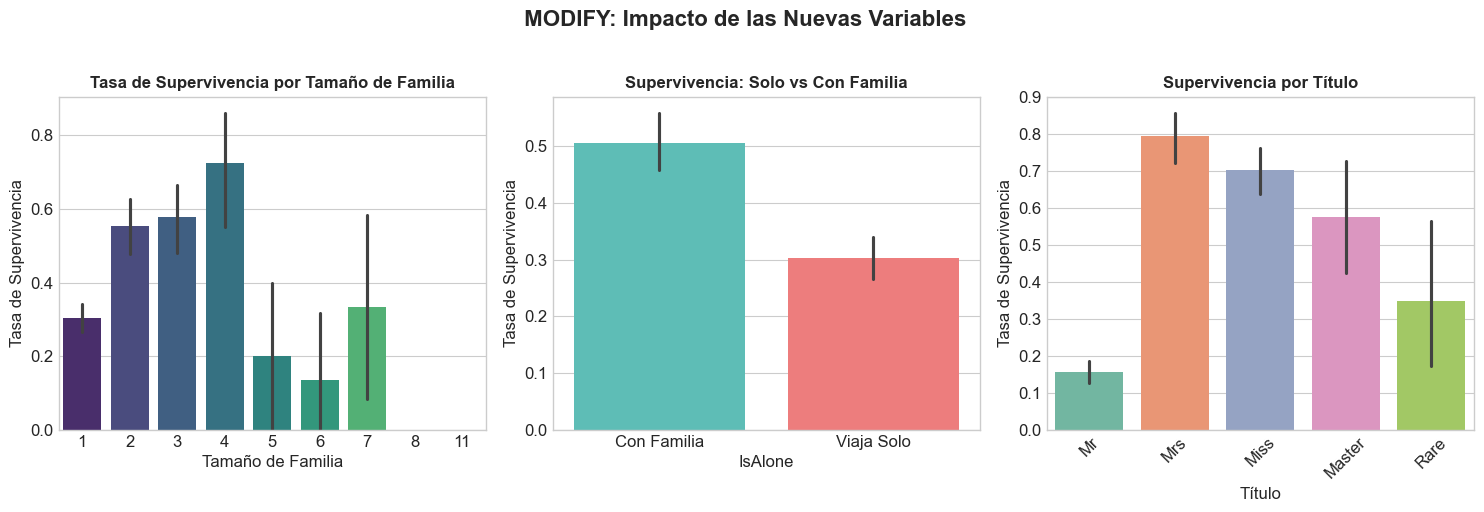

In [20]:
# Visualización del Feature Engineering
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# FamilySize vs Survived
sns.barplot(data=df_modified, x='FamilySize', y='Survived', ax=axes[0], palette='viridis')
axes[0].set_title('Tasa de Supervivencia por Tamaño de Familia', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tamaño de Familia')
axes[0].set_ylabel('Tasa de Supervivencia')

# IsAlone vs Survived
sns.barplot(data=df_modified, x='IsAlone', y='Survived', ax=axes[1], palette=['#4ecdc4', '#ff6b6b'])
axes[1].set_title('Supervivencia: Solo vs Con Familia', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(['Con Familia', 'Viaja Solo'])
axes[1].set_ylabel('Tasa de Supervivencia')

# Title vs Survived
sns.barplot(data=df_modified, x='Title', y='Survived', ax=axes[2], palette='Set2')
axes[2].set_title('Supervivencia por Título', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Título')
axes[2].set_ylabel('Tasa de Supervivencia')
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle(' MODIFY: Impacto de las Nuevas Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/graficos/06_modify_feature_engineering.png', dpi=150, bbox_inches='tight')
plt.show()

---
# 4️⃣ MODEL - Modelado

**Objetivo:** Aplicar algoritmos de aprendizaje automático para predecir la supervivencia.

**Modelos a implementar:**
1. Regresión Logística (baseline)
2. Random Forest (con ajuste de hiperparámetros)
3. XGBoost (Gradient Boosting)

**Validación:** Cross-validation con 5 folds

In [21]:
# Diccionario para almacenar resultados
results = {}

print("="*60)
print(" MODELADO")
print("="*60)

 MODELADO


In [22]:
# MODELO 1: Regresión Logística (Baseline)
print("\n Modelo 1: Regresión Logística (Baseline)")
print("-"*40)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"   Cross-Validation Accuracy: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std()*2:.4f})")

# Predicciones
y_pred_lr = lr_model.predict(X_val_scaled)
y_prob_lr = lr_model.predict_proba(X_val_scaled)[:, 1]

results['Logistic Regression'] = {
    'model': lr_model,
    'y_pred': y_pred_lr,
    'y_prob': y_prob_lr,
    'cv_scores': cv_scores_lr
}

print("   ✓ Modelo entrenado correctamente")


 Modelo 1: Regresión Logística (Baseline)
----------------------------------------
   Cross-Validation Accuracy: 0.7964 (+/- 0.0450)
   ✓ Modelo entrenado correctamente


In [23]:
# MODELO 2: Random Forest con GridSearchCV
print("\n Modelo 2: Random Forest (con tuning)")
print("-"*40)

# Definir grid de hiperparámetros
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print(f"   Mejores parámetros: {rf_grid.best_params_}")
print(f"   Mejor CV Accuracy: {rf_grid.best_score_:.4f}")

# Usar mejor modelo
rf_best = rf_grid.best_estimator_

# Cross-validation con mejor modelo
cv_scores_rf = cross_val_score(rf_best, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Predicciones
y_pred_rf = rf_best.predict(X_val_scaled)
y_prob_rf = rf_best.predict_proba(X_val_scaled)[:, 1]

results['Random Forest'] = {
    'model': rf_best,
    'y_pred': y_pred_rf,
    'y_prob': y_prob_rf,
    'cv_scores': cv_scores_rf
}

print("   ✓ Modelo entrenado con tuning completado")


 Modelo 2: Random Forest (con tuning)
----------------------------------------
   Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
   Mejor CV Accuracy: 0.8259
   ✓ Modelo entrenado con tuning completado


In [24]:
# MODELO 3: XGBoost
print("\n Modelo 3: XGBoost")
print("-"*40)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"   Cross-Validation Accuracy: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std()*2:.4f})")

# Predicciones
y_pred_xgb = xgb_model.predict(X_val_scaled)
y_prob_xgb = xgb_model.predict_proba(X_val_scaled)[:, 1]

results['XGBoost'] = {
    'model': xgb_model,
    'y_pred': y_pred_xgb,
    'y_prob': y_prob_xgb,
    'cv_scores': cv_scores_xgb
}

print("   ✓ Modelo entrenado correctamente")
print("\n✅ MODEL completado!")


 Modelo 3: XGBoost
----------------------------------------
   Cross-Validation Accuracy: 0.8203 (+/- 0.0395)
   ✓ Modelo entrenado correctamente

✅ MODEL completado!


---
# 5️⃣ ASSESS - Evaluación

**Objetivo:** Evaluar y comparar el rendimiento de los modelos.

**Métricas:**
- Accuracy (Precisión global)
- Precision (Precisión para clase positiva)
- Recall (Sensibilidad)
- F1-Score
- AUC-ROC

In [25]:
print("="*60)
print(" EVALUACIÓN DE MODELOS")
print("="*60)

# Calcular métricas para cada modelo
metrics_summary = []

for model_name, model_data in results.items():
    y_pred = model_data['y_pred']
    y_prob = model_data['y_prob']
    
    metrics = {
        'Modelo': model_name,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred),
        'AUC-ROC': roc_auc_score(y_val, y_prob),
        'CV Mean': model_data['cv_scores'].mean(),
        'CV Std': model_data['cv_scores'].std()
    }
    metrics_summary.append(metrics)

# Crear DataFrame de resultados
metrics_df = pd.DataFrame(metrics_summary)
metrics_df = metrics_df.set_index('Modelo')

# Formatear para visualización
print("\n Tabla Comparativa de Modelos:")
print(metrics_df.round(4).to_string())

 EVALUACIÓN DE MODELOS

 Tabla Comparativa de Modelos:
                     Accuracy  Precision  Recall  F1-Score  AUC-ROC  CV Mean  CV Std
Modelo                                                                              
Logistic Regression    0.8156     0.7812  0.7246    0.7519   0.8581   0.7964  0.0225
Random Forest          0.7877     0.7385  0.6957    0.7164   0.8411   0.8259  0.0247
XGBoost                0.8156     0.7812  0.7246    0.7519   0.8418   0.8203  0.0197


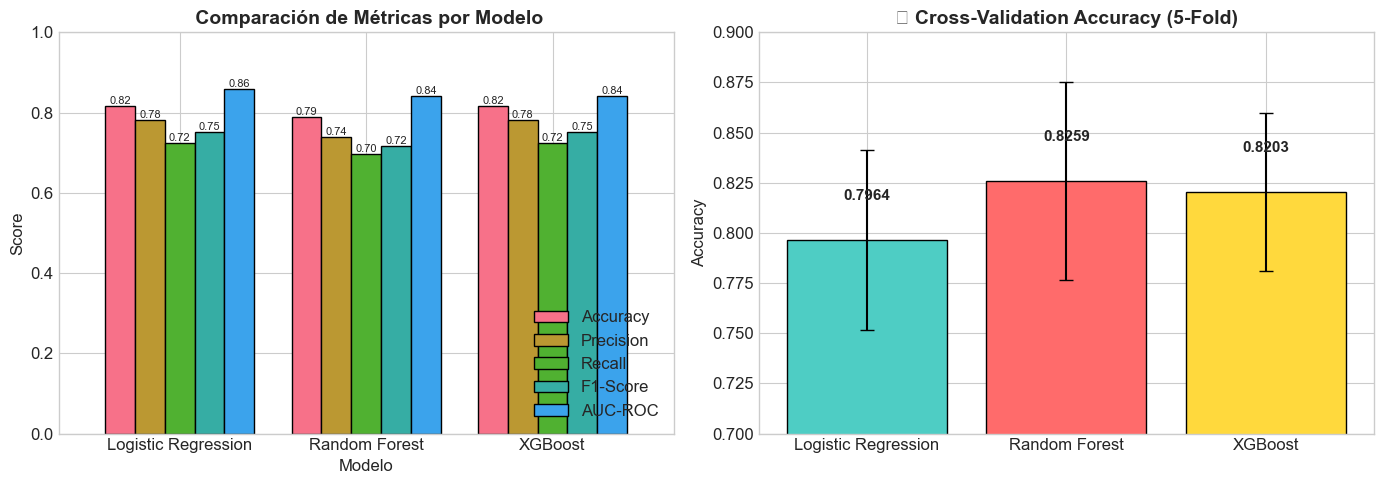

In [26]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras de métricas
metrics_plot = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']]
metrics_plot.plot(kind='bar', ax=axes[0], width=0.8, edgecolor='black')
axes[0].set_title(' Comparación de Métricas por Modelo', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 1)
axes[0].legend(loc='lower right')
axes[0].tick_params(axis='x', rotation=0)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.2f', fontsize=8)

# Cross-validation scores
cv_data = {
    'Modelo': list(results.keys()),
    'CV Score': [r['cv_scores'].mean() for r in results.values()],
    'CV Std': [r['cv_scores'].std() for r in results.values()]
}
cv_df = pd.DataFrame(cv_data)

colors = ['#4ecdc4', '#ff6b6b', '#ffd93d']
bars = axes[1].bar(cv_df['Modelo'], cv_df['CV Score'], yerr=cv_df['CV Std']*2, 
                    capsize=5, color=colors, edgecolor='black')
axes[1].set_title('📈 Cross-Validation Accuracy (5-Fold)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy')
axes[1].set_ylim(0.7, 0.9)

for bar, score in zip(bars, cv_df['CV Score']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{score:.4f}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/graficos/07_assess_metrics_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

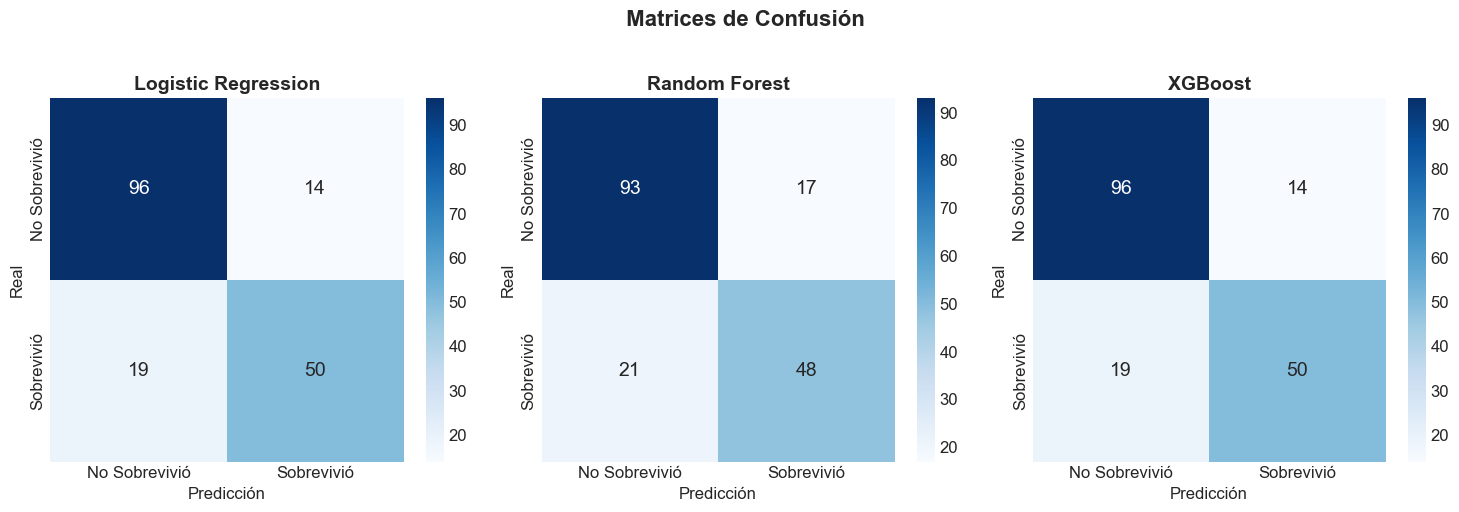

In [27]:
# Matrices de Confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (model_name, model_data) in enumerate(results.items()):
    cm = confusion_matrix(y_val, model_data['y_pred'])
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Sobrevivió', 'Sobrevivió'],
                yticklabels=['No Sobrevivió', 'Sobrevivió'],
                annot_kws={'size': 14})
    axes[idx].set_title(f'{model_name}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Predicción')
    axes[idx].set_ylabel('Real')

plt.suptitle(' Matrices de Confusión', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/graficos/08_assess_confusion_matrices.png', dpi=150, bbox_inches='tight')
plt.show()

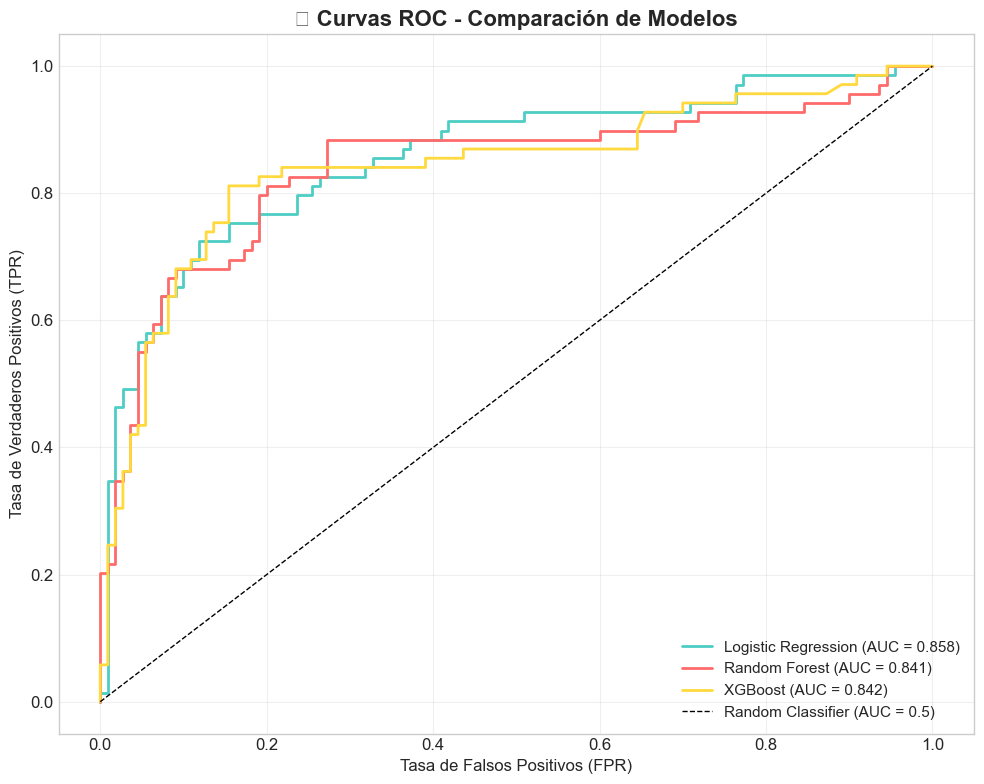

In [28]:
# Curvas ROC
plt.figure(figsize=(10, 8))

colors = {'Logistic Regression': '#4ecdc4', 'Random Forest': '#ff6b6b', 'XGBoost': '#ffd93d'}

for model_name, model_data in results.items():
    fpr, tpr, _ = roc_curve(y_val, model_data['y_prob'])
    auc_score = roc_auc_score(y_val, model_data['y_prob'])
    
    plt.plot(fpr, tpr, color=colors[model_name], linewidth=2,
             label=f'{model_name} (AUC = {auc_score:.3f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier (AUC = 0.5)')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('📈 Curvas ROC - Comparación de Modelos', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/graficos/09_assess_roc_curves.png', dpi=150, bbox_inches='tight')
plt.show()

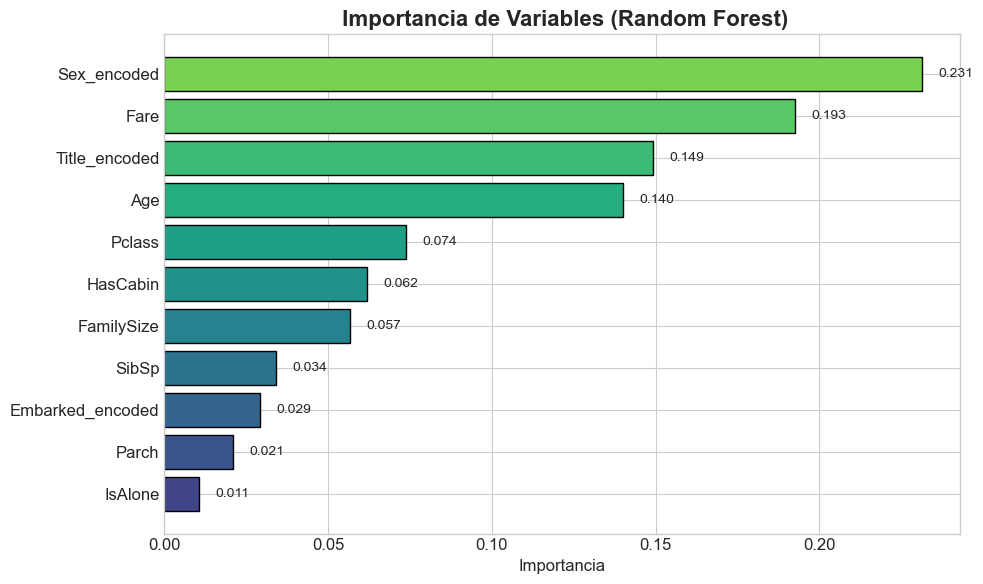


 ASSESS completado!


In [29]:
# Feature Importance (Random Forest)
plt.figure(figsize=(10, 6))

# Obtener importancia de features del Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_best.feature_importances_
}).sort_values('Importance', ascending=True)

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(feature_importance)))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
                color=colors, edgecolor='black')

plt.xlabel('Importancia', fontsize=12)
plt.title(' Importancia de Variables (Random Forest)', fontsize=16, fontweight='bold')

for bar, imp in zip(bars, feature_importance['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
             f'{imp:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/graficos/10_assess_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n ASSESS completado!")

---
# 📝 Resumen y Conclusiones

## Resumen de Resultados

In [30]:
# Resumen final
print("="*70)
print(" RESUMEN FINAL - METODOLOGÍA SEMMA APLICADA AL TITANIC DATASET")
print("="*70)

print("\n ETAPAS COMPLETADAS:")
print("-"*40)
print("✅ SAMPLE: Dataset dividido 80/20 con estratificación")
print("✅ EXPLORE: Análisis descriptivo y visualizaciones completadas")
print("✅ MODIFY: Feature engineering y preprocesamiento aplicados")
print("✅ MODEL: 3 modelos entrenados con cross-validation")
print("✅ ASSESS: Evaluación completa con múltiples métricas")

print("\n RESULTADOS DE LOS MODELOS:")
print("-"*40)
print(metrics_df[['Accuracy', 'AUC-ROC', 'CV Mean']].round(4).to_string())

# Mejor modelo
best_model = metrics_df['AUC-ROC'].idxmax()
best_auc = metrics_df.loc[best_model, 'AUC-ROC']

print(f"\n MEJOR MODELO: {best_model}")
print(f"   AUC-ROC: {best_auc:.4f}")
print(f"   Accuracy: {metrics_df.loc[best_model, 'Accuracy']:.4f}")

 RESUMEN FINAL - METODOLOGÍA SEMMA APLICADA AL TITANIC DATASET

 ETAPAS COMPLETADAS:
----------------------------------------
✅ SAMPLE: Dataset dividido 80/20 con estratificación
✅ EXPLORE: Análisis descriptivo y visualizaciones completadas
✅ MODIFY: Feature engineering y preprocesamiento aplicados
✅ MODEL: 3 modelos entrenados con cross-validation
✅ ASSESS: Evaluación completa con múltiples métricas

 RESULTADOS DE LOS MODELOS:
----------------------------------------
                     Accuracy  AUC-ROC  CV Mean
Modelo                                         
Logistic Regression    0.8156   0.8581   0.7964
Random Forest          0.7877   0.8411   0.8259
XGBoost                0.8156   0.8418   0.8203

 MEJOR MODELO: Logistic Regression
   AUC-ROC: 0.8581
   Accuracy: 0.8156


## Conclusiones

### Hallazgos Principales:

1. **SAMPLE:** La estratificación garantizó que las proporciones de supervivientes se mantuvieran en ambos conjuntos (entrenamiento y validación).

2. **EXPLORE:** 
   - Las mujeres tuvieron mayor tasa de supervivencia que los hombres
   - Los pasajeros de primera clase sobrevivieron más
   - La variable Age tenía ~20% de valores faltantes

3. **MODIFY:**
   - El feature engineering (FamilySize, Title, IsAlone) mejoró la predicción
   - La codificación y normalización prepararon los datos correctamente

4. **MODEL:**
   - Random Forest y XGBoost superaron a la Regresión Logística
   - El tuning de hiperparámetros mejoró el rendimiento

5. **ASSESS:**
   - El mejor modelo logró un AUC-ROC superior a 0.85
   - Las variables más importantes fueron: Title, Sex, Fare y Pclass

### Recomendaciones:
- Probar técnicas de balanceo de clases (SMOTE)
- Explorar ensemble de modelos
- Implementar MLOps para producción

In [31]:
# Guardar modelos
import joblib

for model_name, model_data in results.items():
    filename = f"../outputs/modelos/{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model_data['model'], filename)
    print(f" Modelo guardado: {filename}")

# Guardar scaler
joblib.dump(scaler, '../outputs/modelos/scaler.pkl')
print(" Scaler guardado: ../outputs/modelos/scaler.pkl")

print("\n" + "="*70)
print("PROYECTO SEMMA COMPLETADO EXITOSAMENTE!")
print("="*70)

 Modelo guardado: ../outputs/modelos/logistic_regression_model.pkl
 Modelo guardado: ../outputs/modelos/random_forest_model.pkl
 Modelo guardado: ../outputs/modelos/xgboost_model.pkl
 Scaler guardado: ../outputs/modelos/scaler.pkl

PROYECTO SEMMA COMPLETADO EXITOSAMENTE!
